In [25]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
data = np.loadtxt("Combined-Cycle-Power-Plant-Training-Data.csv",delimiter=",")

In [3]:
data.shape

(7176, 5)

In [4]:
X = data[:,0:4]
Y = data[:,4]

In [5]:
X.shape,Y.shape

((7176, 4), (7176,))

In [6]:
X_ = np.append(X,np.ones(X.shape[0]).reshape(-1,1),axis=1)

In [7]:
X_.shape

(7176, 5)

In [8]:
def cost(X_train,m,Y_train):
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        cost_ += (1/N)*((Y_train[i]-((X_train[i]*m).sum()))**2)
    return cost_

In [9]:
def step_gradient(X_train,Y_train,m,lr):
    
    slope_m = np.zeros(X_train.shape[1])
    N = X_train.shape[0]
    
    for i in range(N):
        slope_m += (2/N)*(Y_train[i]-(m*X_train[i]).sum())*(-X_train[i])
        
    m = m - (lr * slope_m)
    
    return m

In [10]:
def fit(X_train,Y_train,lr=0.001,epochs=100,verbose=False):
    m = np.zeros(X_train.shape[1])
    last_m = m
    cost_array = []
    unit = epochs//100
    for i in range(epochs+1):
        last_m = m
        m = step_gradient(X_train,Y_train,m,lr)
        cost_ = cost(X_train,m,Y_train)
        
        #verbose is used to only show the learning process if required, else it is False by default
        if verbose and i%unit==0:
            print("epoch:",i,"cost:",cost_)
            cost_array.append(cost_)
    
    #To continue the learning loop incase the current epoch and learning parameters doesn't lead to saturation
    cont = input("Do you want to continue?:")
        
    while cont=="y":
        clear_output(wait=True)
        epochs = int(input("Please enter the number of epochs to continue for:"))
        unit = int(input("Please enter the unit point for epochs:"))
        lr_factor = float(input("Please enter the decay factor for the learning rate:"))
        lr*=lr_factor
        for i in range(epochs+1):
            last_m = m
            m = step_gradient(X_train,Y_train,m,lr)
            cost_ = cost(X_train,m,Y_train)
            if verbose and i%unit==0:
                print("epoch:",i,"cost:",cost_)
                cost_array.append(cost_)
        cont = input("Do you want to continue?:")
        
    return m,cost_array

In [11]:
def predict(X_test,m):
    y_pred = []
    for i in range(X_test.shape[0]):
        y_pred.append((X_test[i]*m).sum())
    return np.array(y_pred)

In [12]:
def score(Y_true,Y_pred):
    u = ((Y_true-Y_pred)**2).sum()
    v = ((Y_true-(Y_true.mean()))**2).sum()
    return 1-(u/v)

In [27]:
m, cost_array = fit(X_,Y,epochs=1000,lr=0.0000005,verbose=True)
print(m)

Please enter the number of epochs to continue for:5000
Please enter the unit point for epochs:100
Please enter the decay factor for the learning rate:1
epoch: 0 cost: 53.668943942198545
epoch: 100 cost: 53.24924924572885
epoch: 200 cost: 52.844407435393165
epoch: 300 cost: 52.453775899748685
epoch: 400 cost: 52.076743139900756
epoch: 500 cost: 51.712727151519914
epoch: 600 cost: 51.36117389445726
epoch: 700 cost: 51.021555845122855
epoch: 800 cost: 50.69337062704997
epoch: 900 cost: 50.37613971532857
epoch: 1000 cost: 50.069407210837525
epoch: 1100 cost: 49.77273868041568
epoch: 1200 cost: 49.48572005934743
epoch: 1300 cost: 49.20795661272757
epoch: 1400 cost: 48.939071952465746
epoch: 1500 cost: 48.678707106868586
epoch: 1600 cost: 48.42651963991502
epoch: 1700 cost: 48.182182817494194
epoch: 1800 cost: 47.94538481802812
epoch: 1900 cost: 47.715827985049096
epoch: 2000 cost: 47.493228119432864
epoch: 2100 cost: 47.27731380911737
epoch: 2200 cost: 47.06782579425843
epoch: 2300 cost: 46

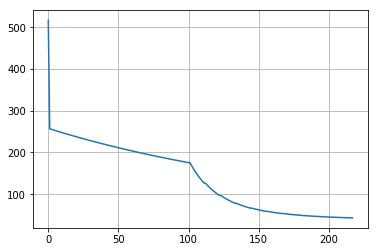

In [28]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [29]:
y_pred = predict(X_,m)
y_pred.shape

(7176,)

In [30]:
score(Y,y_pred)

0.853369791333644

In [31]:
X_test = np.loadtxt("Combined-Cycle-Power-Plant-Testing-Data.csv",delimiter=",")

In [32]:
X_test_ = np.append(X_test,np.ones(X_test.shape[0]).reshape(-1,1),axis=1)

In [33]:
X_test_.shape

(2392, 5)

In [34]:
y_pred_test = predict(X_test_,m)

In [35]:
np.savetxt('pred.csv',y_pred_test)